In [1]:
import collections
import cv2
import re
import numpy as np
from PIL import Image
from IPython import display
import time

td="""....#..
..###.#
#...#.#
.#...##
#.###..
##.#.##
.#..#.."""




def parse(d):
    d=d.split('\n')
    M={}
    for y,l in enumerate(d):
        for x,v in enumerate(l):
            if v=='#':
                M[(x,y)]=0
    #print(len(M.keys()))
    return M

def sz(M):
    X=[]
    Y=[]
    for x,y in M.keys():
        X.append(x)
        Y.append(y)
    w=max(X)-min(X)
    h=max(Y)-min(Y)
    return w,h



def evolve(M,dix):
    #print(dix)
    cds={}
    cds['n']=[(-1,-1),( 0,-1),( 1,-1)]
    cds['s']=[(-1, 1),( 0, 1),( 1, 1)]
    cds['w']=[(-1,-1),(-1, 0),(-1, 1)]
    cds['e']=[( 1,-1),( 1, 0),( 1, 1)]
    
    dirs="".join(cds.keys())
    #print(dirs)
    #assert(0)
    
    p={}
    pc=collections.defaultdict(int)
    
    for x,y in M.keys():
        #fetch neighbours,
        n=[]
        for xx in [-1,0,1]:
            for yy in [-1,0,1]:
                if not (xx==0 and yy==0):
                    xxx=x+xx
                    yyy=y+yy
                    if (xxx,yyy) in M:
                        n.append((xx,yy))
        
        n=set(n)
        
        
        
        if len(n)==0:
            #no neighbours no move
            p[(x,y)]=(x,y)
        else:
            dn=0
            for dd in range(4):
                d=(dd+dix)%4
                lsd=cds[dirs[d]]
                if len(n.intersection(set(lsd)))==0:
                    dx,dy=lsd[1]
                    p[(x,y)]=(x+dx,y+dy)
                    dn=1
                    break
            if not dn:
                p[(x,y)]=(x,y)
    
    #print(len(p.keys()),len(M.keys()))
    assert(len(p.keys())==len(M.keys()))
    
    #find collisions
    for k in p.keys():
        pc[p[k]]+=1
        
    M2={}
    for x,y in p.keys():
        xx,yy=p[(x,y)]
        
        if pc[(xx,yy)]==1:
            M2[(xx,yy)]=0
        else:
            M2[(x,y)]=0
    
    return M2
                    
                    

def score(M):
    w,h=sz(M)
    print(w,h,len(M.keys()))
    return (w+1)*(h+1)-len(M.keys())

def pretty(M):
    
    X=[]
    Y=[]
    for x,y in M.keys():
        X.append(x)
        Y.append(y)
    w=max(X)-min(X)+1
    h=max(Y)-min(Y)+1
    
    C=[[255,0,255],[0,0,0],[200,200,200],[255,0,255],[255,255,0],[0,255,255]]
    
    
    pix = np.zeros([h,w,3]).astype(np.ubyte)
    for x,y in M.keys():
        pix[y-min(Y),x-min(X),:]=C[0]
    
    
    
    F=2
    pix = cv2.resize(pix, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    
    display.clear_output(wait=True)
    
    display.display(Image.fromarray(pix, 'RGB'))
    #time.sleep(1)


def p1(d):
    dix=0
    M=parse(d)
    pretty(M)
    for i in range(10):
        M=evolve(M,dix)
        dix+=1
        pretty(M)
    return score(M)

print("test1:",p1(td),110)


    
    

11 10 22
test1: 110 110


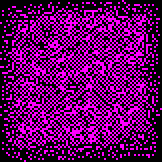

80 80 2574
part1: 3987 3987


In [2]:
print('part1:',p1(open("23.txt").read()),3987)

In [3]:
def p2(d):
    M=parse(d)
    steps=0
    dix=0
    while 1:
        L=M
        M=evolve(M,dix)
        dix+=1
        steps+=1
        ms=set(L.keys()).difference(set(M.keys()))
        moves = len(ms)
        #if moves <17:
        #    print(ms)
        
        if steps%100==0:
            pretty(M)
            print("%6d %6d"%(steps,moves),end="\r")
        
        if moves==0:
            pretty(M)
            break
        
    return steps


print('\ntest2:',p2(td),20)
#875 too low



test2: 20 20


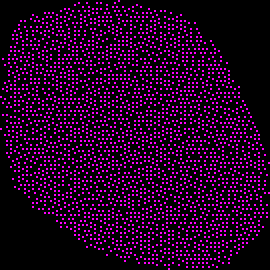


part2: 938 938


In [4]:
print('\npart2:',p2(open("23.txt").read()),938)
#875 too low
#not 829
